In [1]:
from datetime import date, datetime
import ndjson
import numpy as np
import pandas as pd
import sys

import matplotlib.pyplot as plt
import colorcet as cc
import seaborn as sns
from top2vec import Top2Vec
from tqdm import tqdm

## Load topics


In [8]:
df = pd.read_csv('../resources/chronicles-corpus/230602_topic_words_theme_2.csv', sep=';')
df.head()

topic                                              words  \
0      0  ['wolkachtig' 'verdonkerd' 'buiachtig' 'motbui...   
1      1  ['overleede' 'do' 'hat' 'genaampt' 'weeduwe' '...   
2      2  ['doornijck' 'cortrijck' 'dewelcke' 'ghemaekt'...   
3      3  ['le' 'les' 'au' 'dont' 'dans' 'la' 'ailleurs'...   
4      4  ['souldaten' 'uut' 'ypere' 'capyteyn' 'vendere...   

                   themes  category  primitives  
0   0. Weather conditions         1        5173  
1  1. Death and relatives         9        3112  
2                  2. War         2        2149  
3    3. *French language*        14        1971  
4  4. Soldiers and troups         2        1878

## Dominant topic per primitive

In [2]:
with open('../resources/chronicles-corpus/primitive_topic.ndjson') as fin:
	primtop = ndjson.load(fin)

primtop = pd.DataFrame(primtop)

In [3]:
all_rows = []

for i, r in tqdm(primtop.iterrows(), total=primtop.shape[0]):
    d_row = dict(r)
    try:
        d_row['clean_month_dt'] = date.fromisoformat(d_row['clean_month'])
        all_rows.append(d_row)
    except ValueError:
        continue

primtop = pd.DataFrame(all_rows)
primtop.shape

100%|██████████| 77176/77176 [00:05<00:00, 13464.62it/s]


(77147, 6)

In [9]:
primtop = primtop.merge(df[['topic', 'category']], left_on='topic_id', right_on='topic').sort_values('clean_month')

In [4]:
mapping = {1: 'weather and climate', 2: 'war and military in the Low Countries', 3: 'administration and local government', 4: 'religion and church',
             5: 'urban building, infrastructure and topography', 6: 'trade and economy', 7: 'local and regional politics and upheaval', 8: 'international politics, diplomacy and war',
            9: 'life events and social interactions', 10: 'celebrations and festivities', 11: '(natural) disasters and damage', 12: 'history and dynasties',
            13: 'misc', 14: 'language', 15: 'crime and justice', 16: 'citizens, corporative life, urban institutions'}

/var/folders/h3/_6gy9k2x3tgbm9pj_grj43rr0000gn/T/ipykernel_33122/1632630961.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chronicle['category'] = chronicle['category'].replace(mapping)


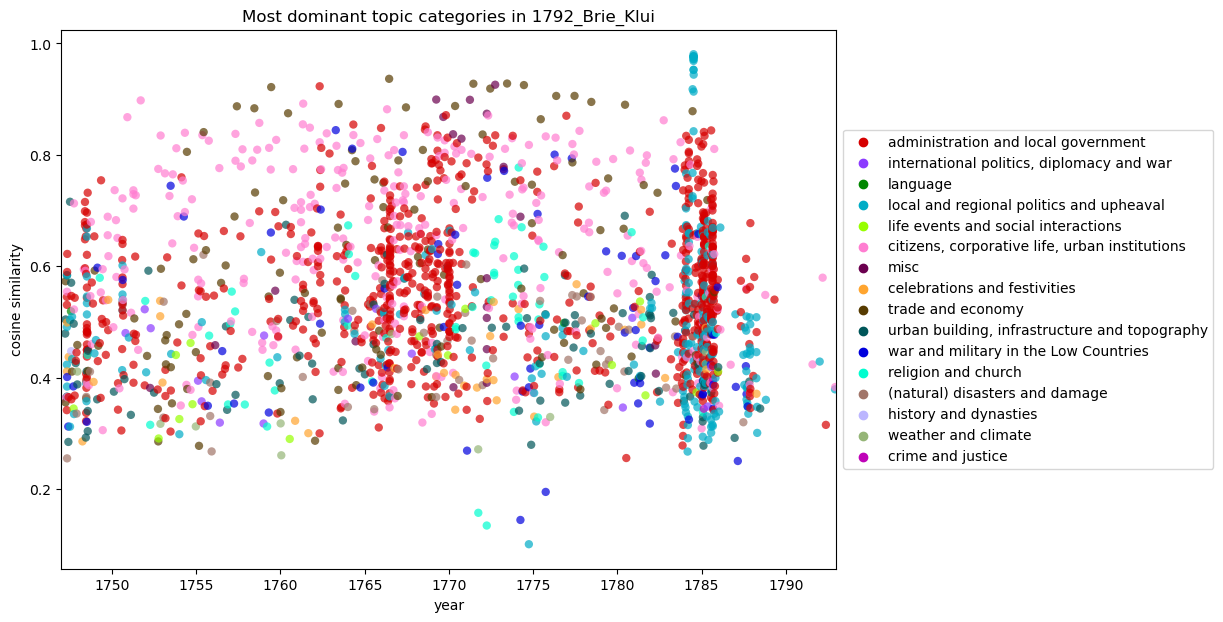

In [41]:
palette1 = sns.color_palette(cc.glasbey, n_colors=16)
call_nr = '1792_Brie_Klui'
chronicle = primtop[primtop['call_nr_clean'] == call_nr]
chronicle['category'] = chronicle['category'].replace(mapping)

plt.figure(figsize=(10,7))
sns.scatterplot(data=chronicle, x='clean_month_dt', y='topic_score', hue='category', palette=palette1, alpha=0.7, edgecolor='none')
plt.xlim([date(1747, 1, 1), date(1792, 12, 31)])
plt.xlabel('year')
plt.ylabel('cosine similarity')
plt.title(f'Most dominant topic categories in {call_nr}')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))


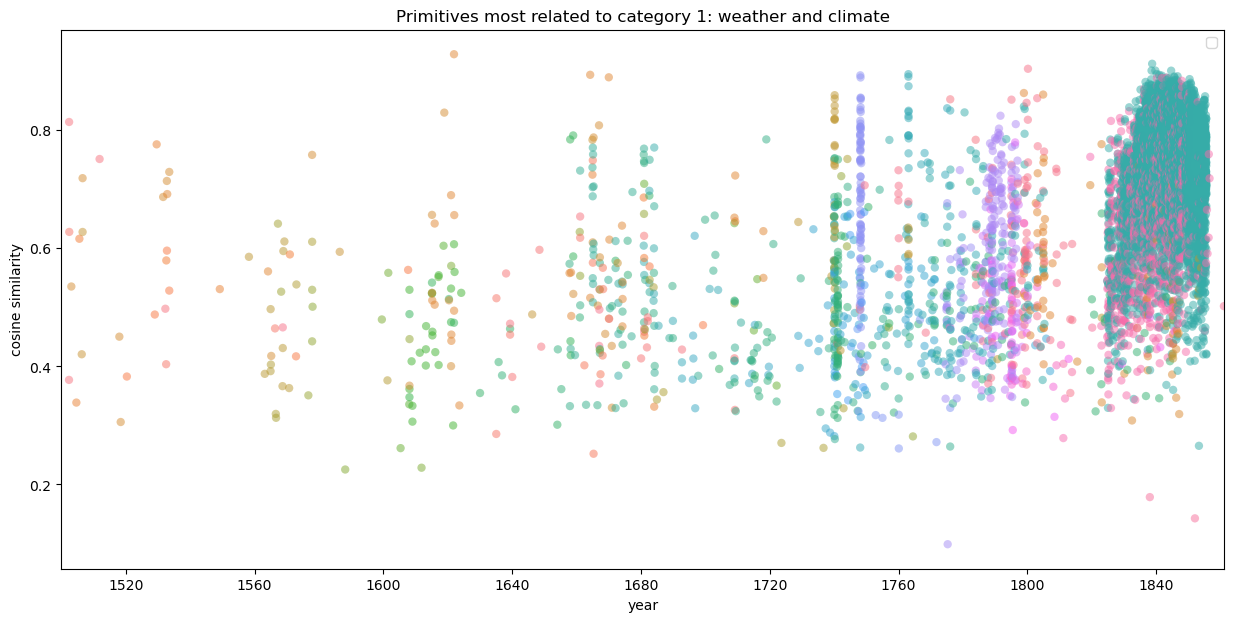

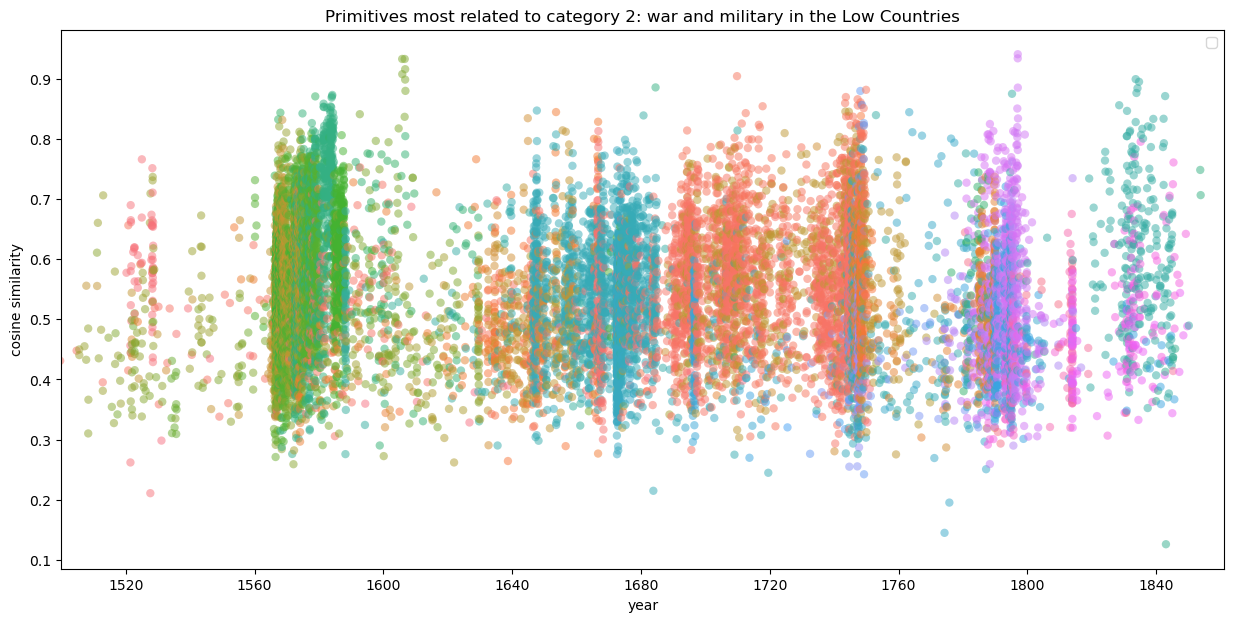

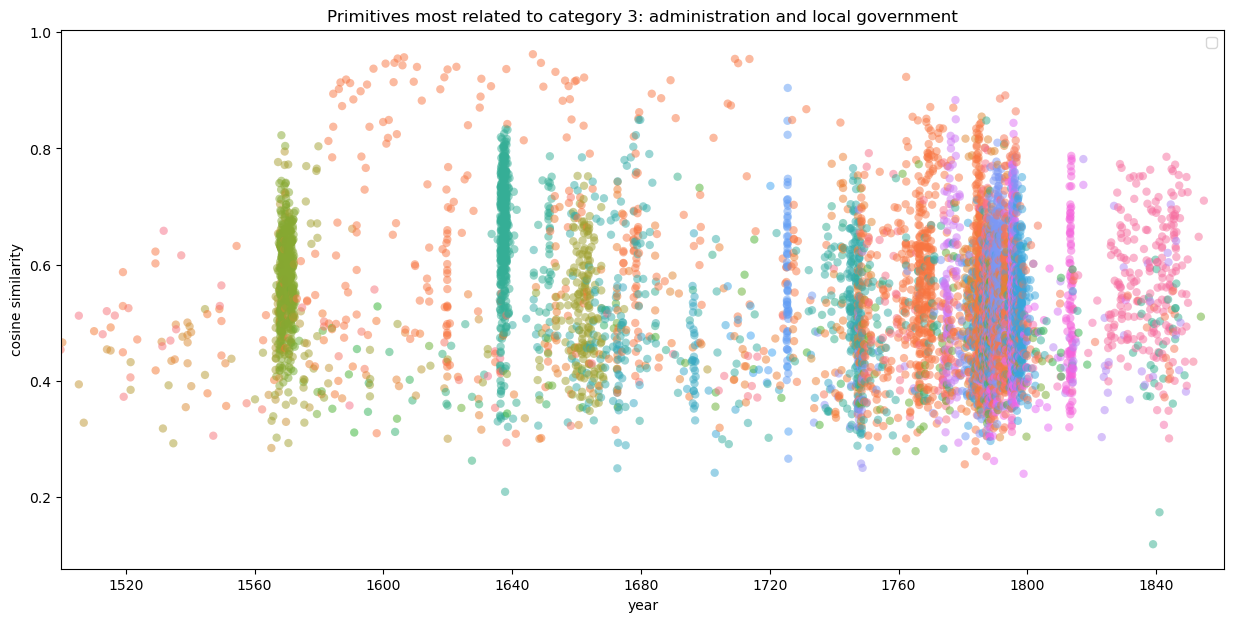

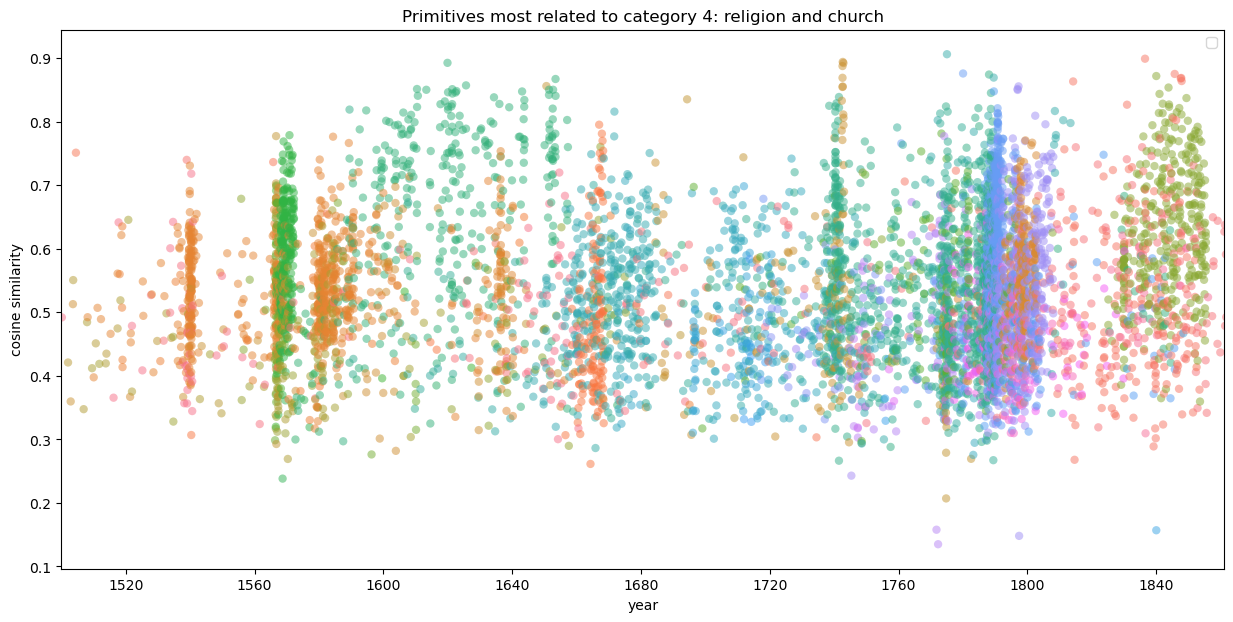

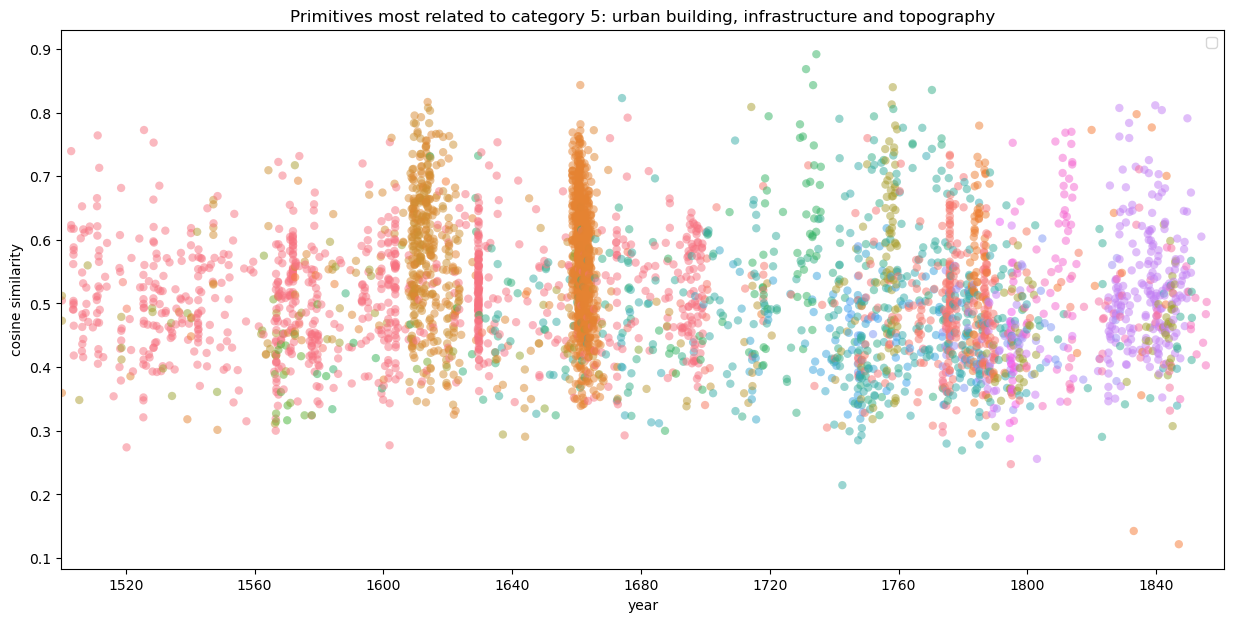

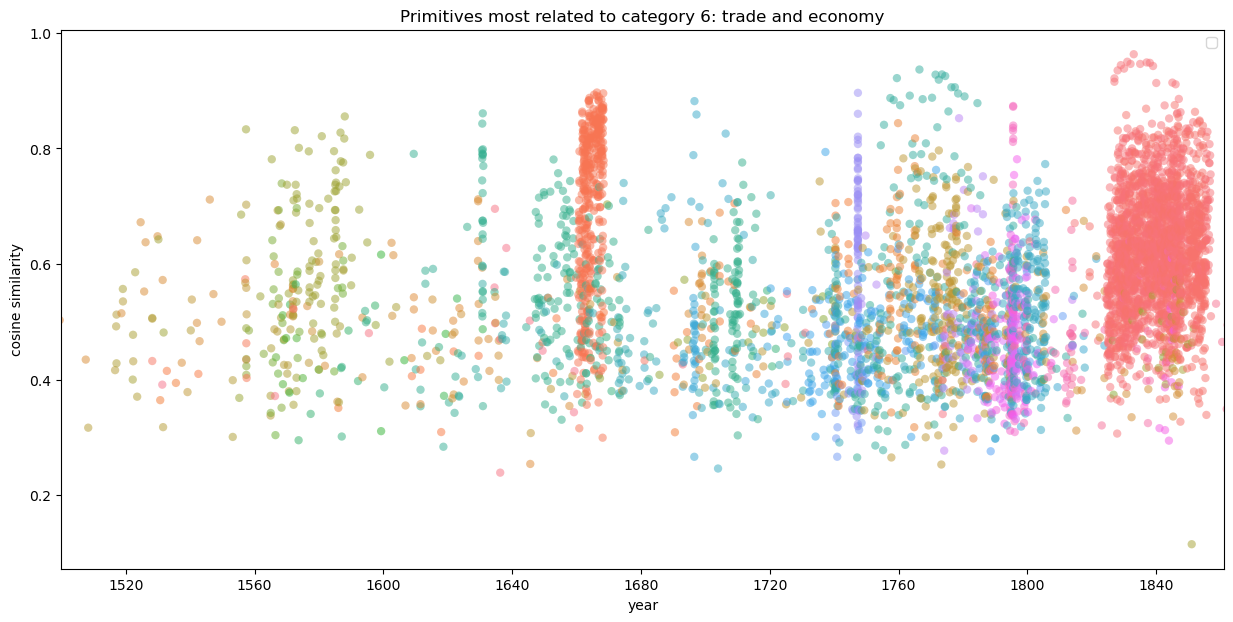

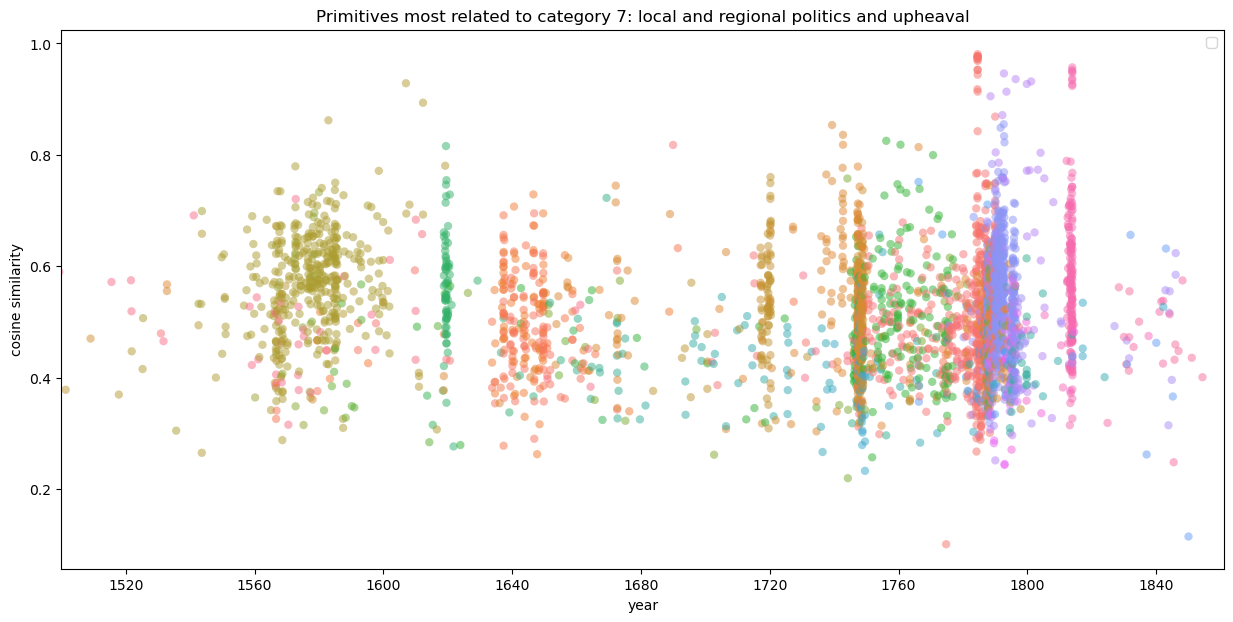

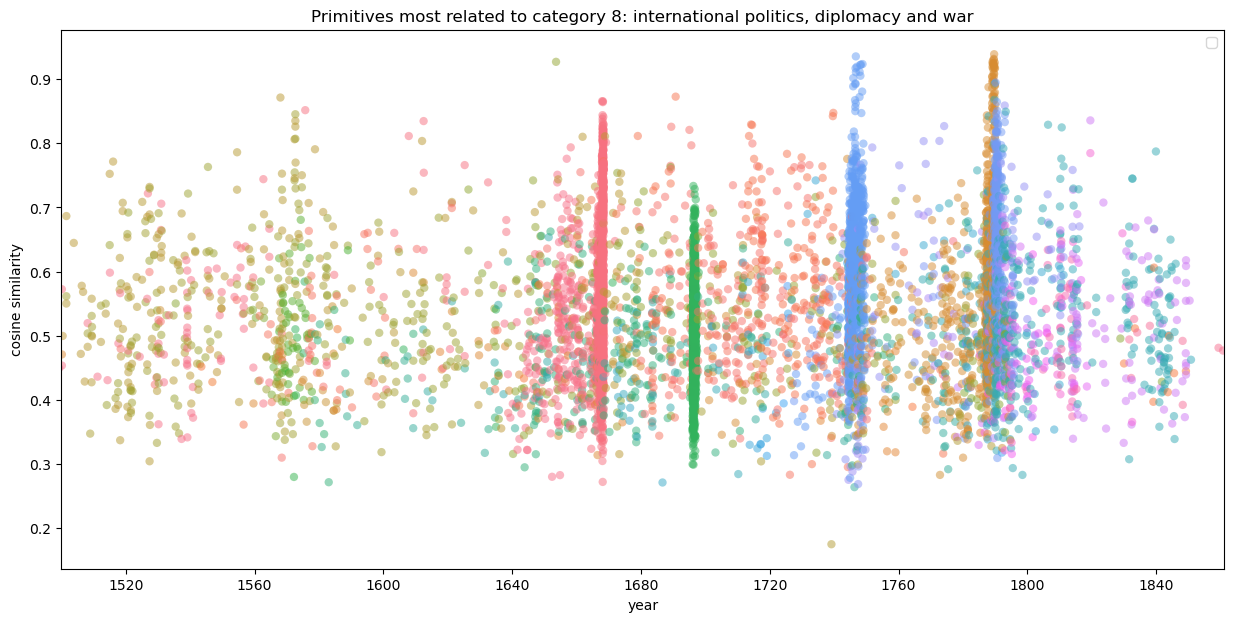

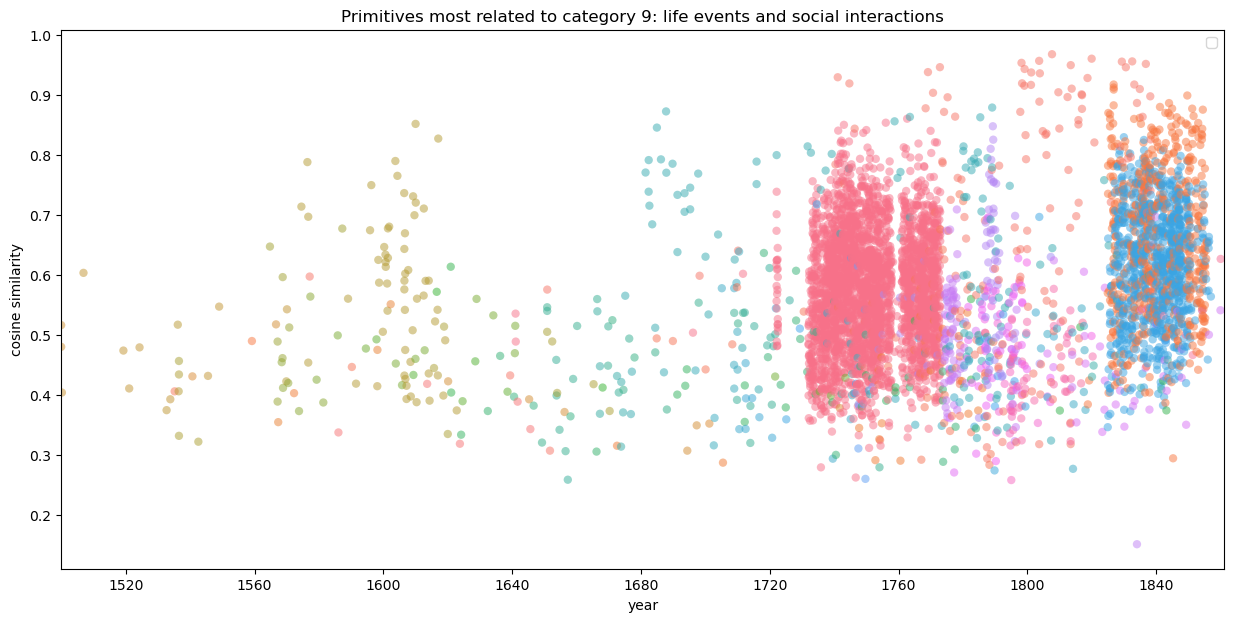

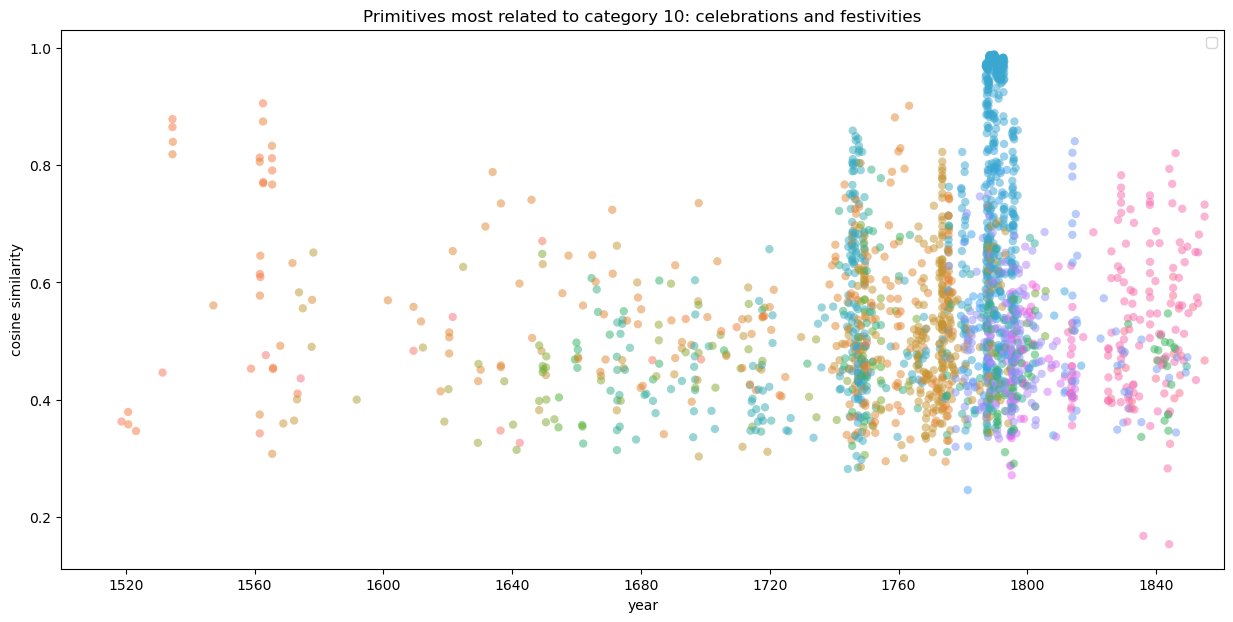

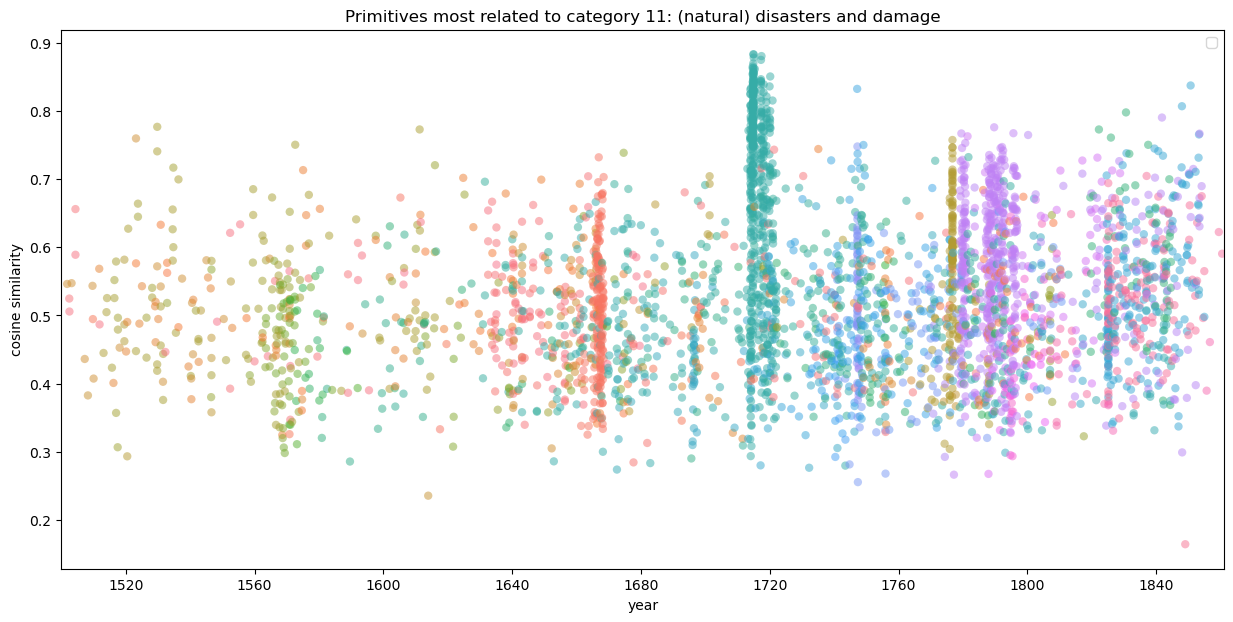

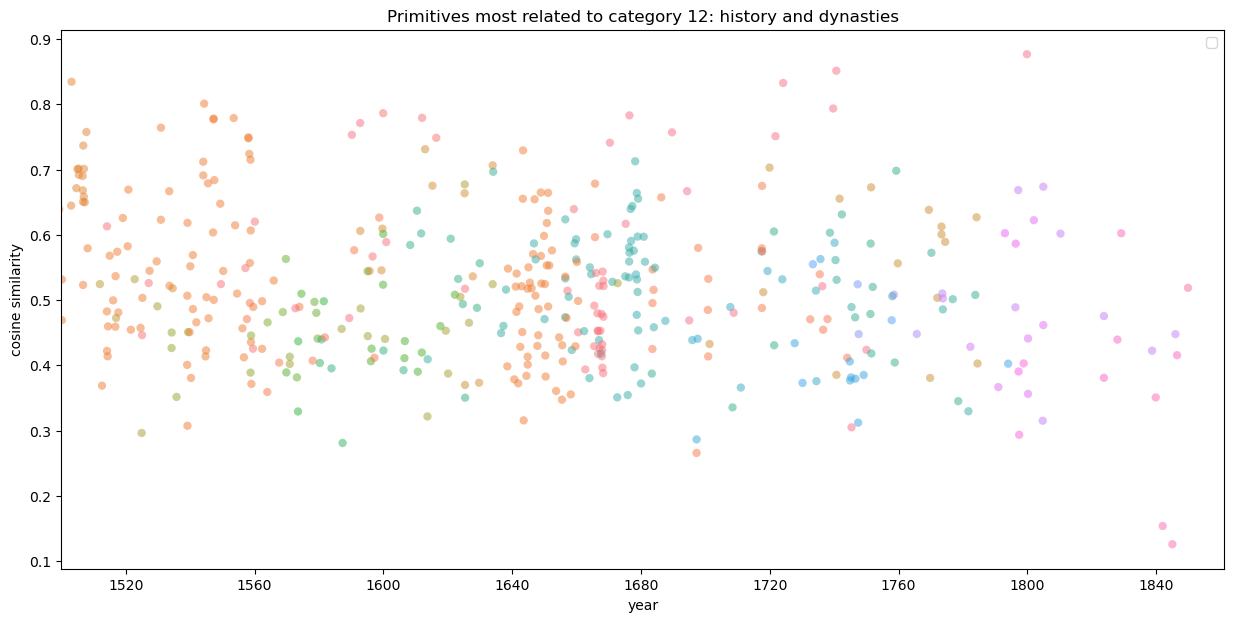

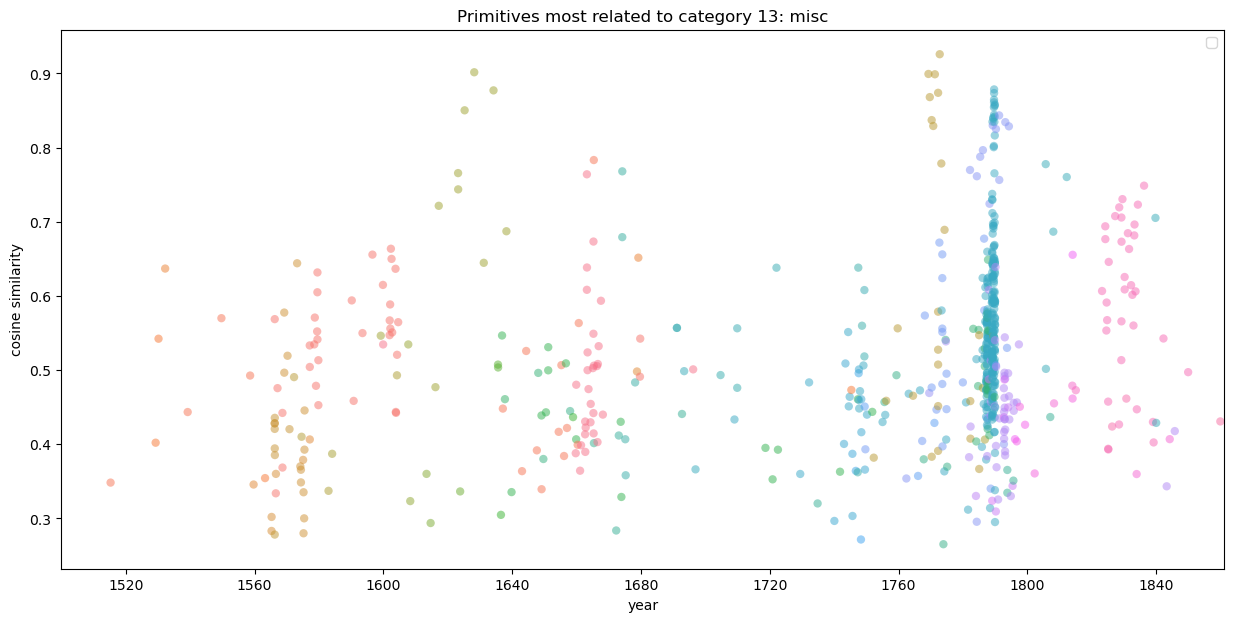

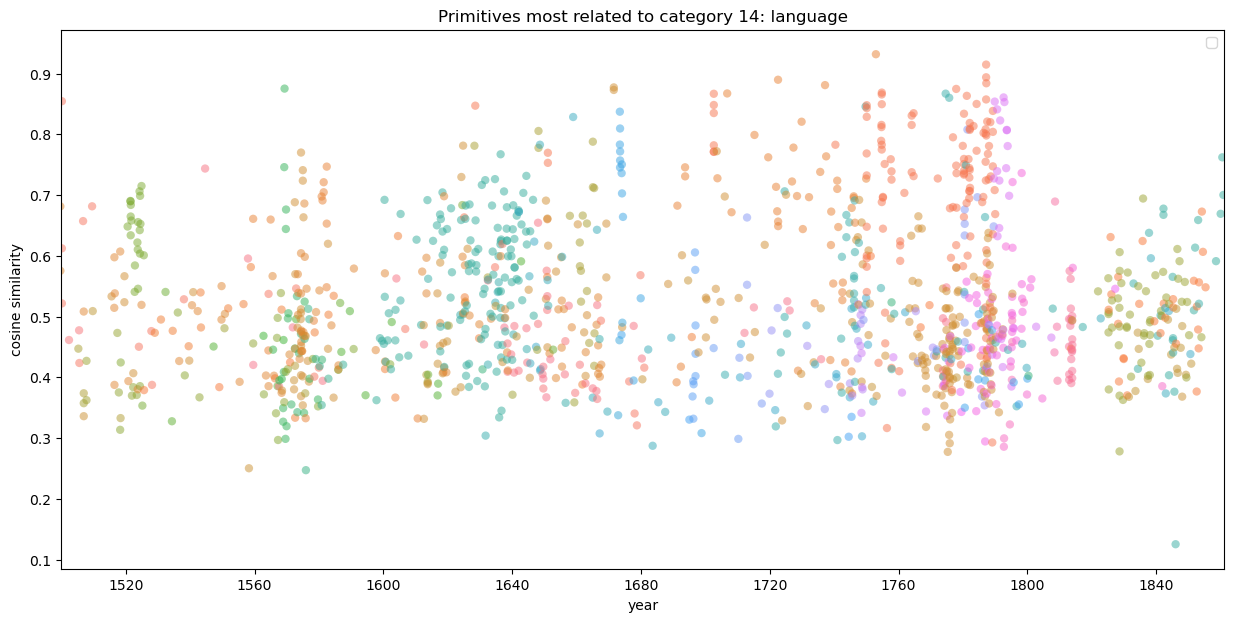

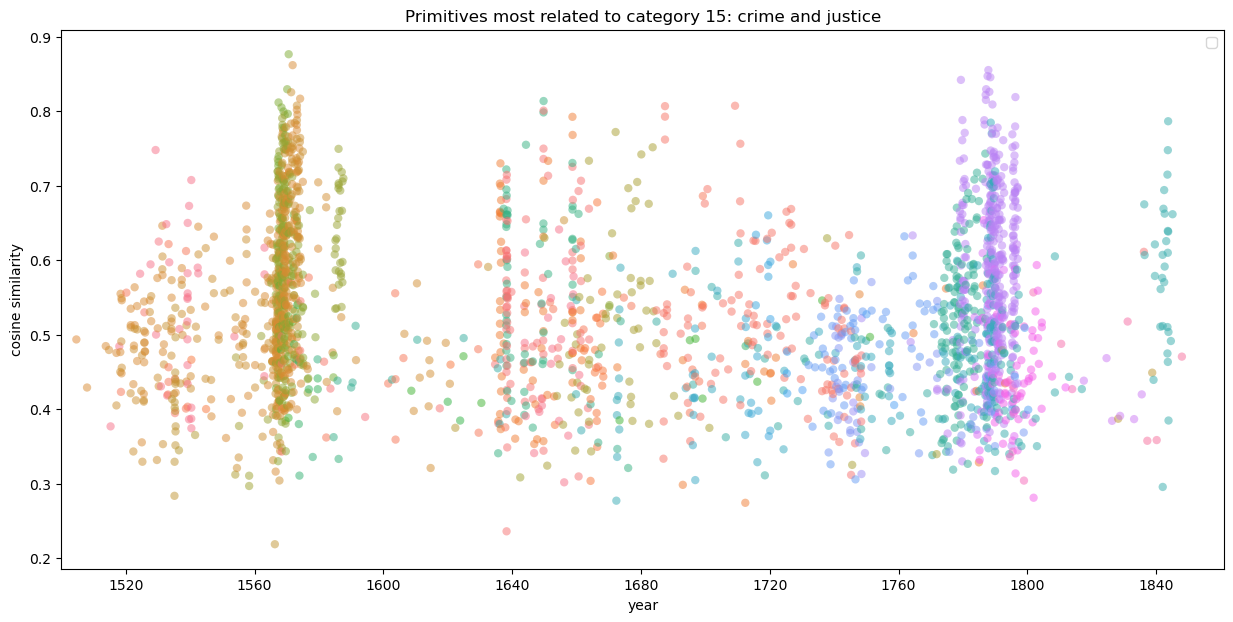

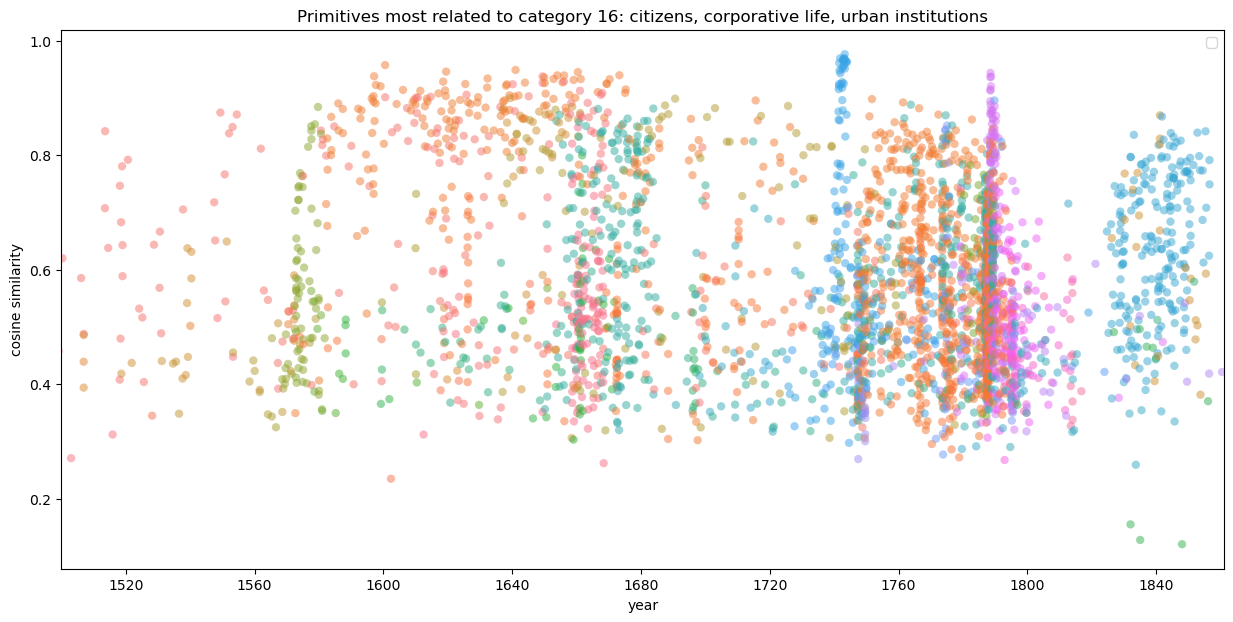

In [20]:
for i in range(1,17):
    category = primtop[primtop['category'] == i]

    plt.figure(figsize=(15,7))
    plt.xlim([date(1500, 1, 1), date(1860, 12, 31)])
    sns.scatterplot(data=category, x='clean_month_dt', y='topic_score', hue='call_nr_clean', alpha=0.5, edgecolor='none')
    plt.xlabel('year')
    plt.ylabel('cosine similarity')
    plt.title(f'Primitives most related to category {i}: {mapping[i]}')
    plt.legend('')
